# 📊 Energy Consumption Prediction – LightGBM Model

This notebook walks through data loading, preprocessing, model training, evaluation, and visualization steps for predicting energy consumption using a LightGBM regressor.

In [3]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 2.2 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 2.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.5 MB 3.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 3.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import joblib

## 📥 Load Dataset

In [5]:
# Load dataset
df = pd.read_csv("../data/energy_data.csv")
df.head()

,DateTime,Temperature,Humidity,ApplianceUsage,LightUsage,Occupancy,EnergyConsumption
0,2022-01-01 00:00:00,22.483571,79.807262,471.287222,114.286200,1,369.018777
1,2022-01-01 01:00:00,19.308678,46.477107,476.467966,61.182437,4,503.600777
2,2022-01-01 02:00:00,23.238443,49.081052,571.732478,62.658606,4,489.374559
3,2022-01-01 03:00:00,27.615149,60.901876,499.122418,104.140685,0,306.732081
4,2022-01-01 04:00:00,18.829233,65.922074,668.403339,120.737410,4,583.587909


## 🔍 Exploratory Data Analysis

In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           8737 non-null   object 
 1   Temperature        8737 non-null   float64
 2   Humidity           8737 non-null   float64
 3   ApplianceUsage     8737 non-null   float64
 4   LightUsage         8737 non-null   float64
 5   Occupancy          8737 non-null   int64  
 6   EnergyConsumption  8737 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 477.9+ KB


DateTime             0
Temperature          0
Humidity             0
ApplianceUsage       0
LightUsage           0
Occupancy            0
EnergyConsumption    0
dtype: int64

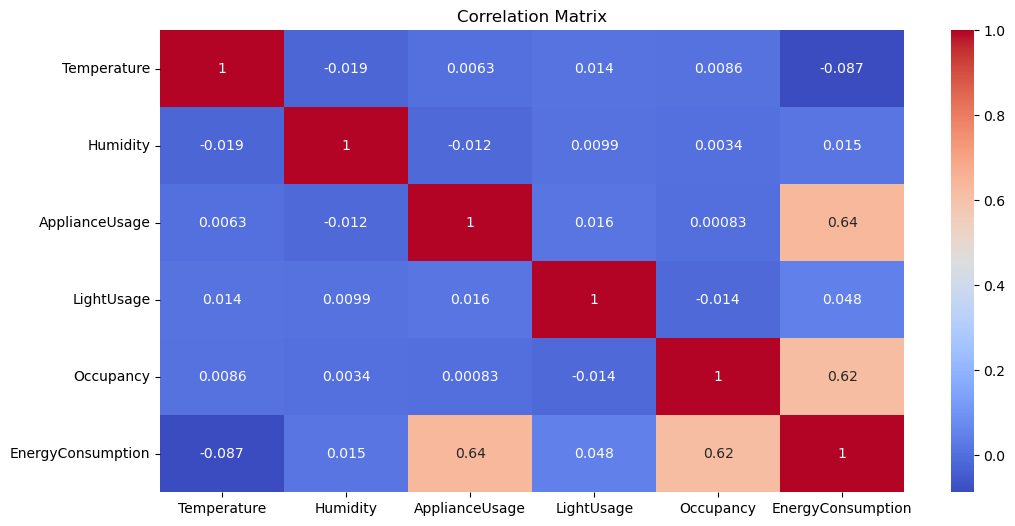

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## ⚙️ Data Preprocessing

In [14]:
# Convert DateTime and extract features
df["DateTime"] = pd.to_datetime(df["DateTime"])
df["Hour"] = df["DateTime"].dt.hour
df["DayOfWeek"] = df["DateTime"].dt.dayofweek

In [15]:
# Define features and target
X = df.drop("EnergyConsumption", axis=1)
y = df["EnergyConsumption"]

# Drop original datetime column
X = X.drop("DateTime", axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Train LightGBM Model

In [16]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 6989, number of used features: 7
[LightGBM] [Info] Start training from score 387.785868


LGBMRegressor()

## 📊 Model Evaluation

In [17]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 41.45
RMSE: 51.57
R²: 0.78


## 💾 Save Trained Model

In [ ]:
joblib.dump(model, "../models/lightgbm_model.pkl")

## 📈 Actual vs Predicted Plot

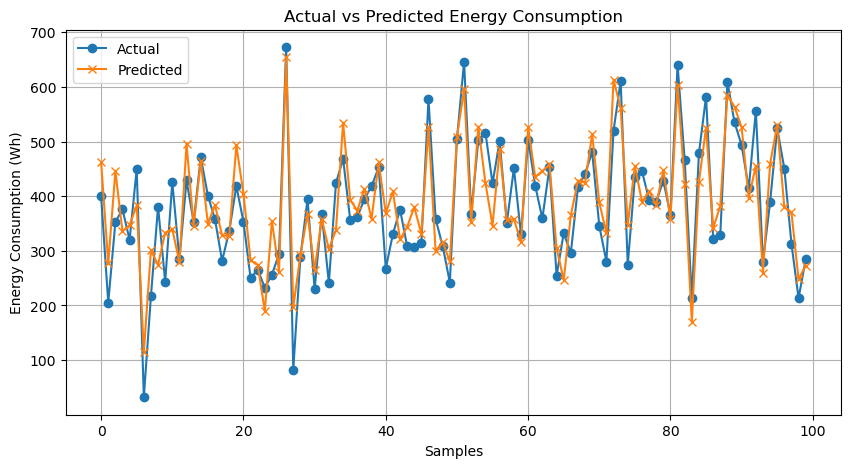

In [18]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", marker="o")
plt.plot(y_pred[:100], label="Predicted", marker="x")
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Samples")
plt.ylabel("Energy Consumption (Wh)")
plt.legend()
plt.grid(True)
plt.show()